# **Part 1: Data preparation**

**Assignment 1**

In [39]:
import pandas as pd
url = "https://raw.githubusercontent.com/Liz283/DataMining/main/1662109Pet%20shop.csv"
df = pd.read_csv(url)
df.head()
df.isnull().sum()

Unnamed: 0            0
products_sold         0
product_category      0
quality             112
satisfaction          0
discount              0
retail_price        159
perc_physical        69
market_size           0
dtype: int64

In [58]:
import statsmodels.formula.api as sm
# Convert categorical variables into dummy variables
df_dummies = pd.get_dummies(df[['product_category', 'quality']], drop_first=True)

# Concatenate the original dataframe with the new dummy variables
df_with_dummies = pd.concat([df, df_dummies], axis=1)

# Display the first few rows of the new dataframe to verify the transformation
df_with_dummies.head()

from statsmodels.formula.api import ols

# Remove rows with missing values to prepare data for regression analysis
df_clean = df_with_dummies.dropna()

# Define the formula for the regression model
# Including all independent variables (excluding the original index column and the response variable)

# Fit the regression model
model = ols('satisfaction ~ products_sold + product_category_health + product_category_other + product_category_toys + quality_premium + discount + retail_price + perc_physical + market_size', data=df_clean).fit()
print (model.summary())

# Calculate Cook's D to identify outliers
CooksD = model.get_influence().cooks_distance
n = len(df_clean)

# Flag outliers based on Cook's D threshold
df_clean['Outlier'] = CooksD[0] > 4/n


                            OLS Regression Results                            
Dep. Variable:           satisfaction   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     220.5
Date:                Fri, 05 Apr 2024   Prob (F-statistic):          2.44e-288
Time:                        20:11:59   Log-Likelihood:                -811.76
No. Observations:                1931   AIC:                             1644.
Df Residuals:                    1921   BIC:                             1699.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

<ipython-input-58-c32ceac182ff>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Outlier'] = CooksD[0] > 4/n


In [53]:
#Inspect the outliers
print(df_clean[df_clean.Outlier==True])

      Unnamed: 0  products_sold product_category    quality  satisfaction  \
3              4         134612             toys  off_brand           2.8   
74            75         142294           health  off_brand           2.6   
81            82          96309           health    premium           2.2   
156          157          57535            other    premium           1.9   
171          172         175822             food    premium           2.2   
...          ...            ...              ...        ...           ...   
2148        2149          76849             toys    premium           4.7   
2162        2163         100743           health    premium           2.8   
2163        2164         111248             toys    premium           2.7   
2191        2192          72268            other    premium           4.6   
2214        2215          95990             toys    premium           2.9   

      discount  retail_price  perc_physical  market_size  \
3            7 

**Assignment 2**

Prepared Data: Converted categorical variables into dummy variables using pd.get_dummies() to facilitate the inclusion of these variables in the regression model. This step is necessary because regression models require numerical input.

Data Concatenation: Combined the original dataframe with the newly created dummy variables to have a comprehensive set of predictors for the regression model.

Handled Missing Values: Employed IterativeImputer to impute missing values in the dataset. Missing data can bias results if not appropriately handled, making imputation a critical step.

Fitted the Regression Model: Used the ols function from statsmodels.formula.api to fit a linear regression model. The dependent variable was satisfaction, and the independent variables included products_sold, dummy variables for product_category and quality, and other numerical predictors.


In [85]:
from statsmodels.formula.api import ols
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Convert categorical variables into dummy variables
df_dummies = pd.get_dummies(df[['product_category', 'quality']], drop_first=True)

# Concatenate the original dataframe with the new dummy variables
df_with_dummies = pd.concat([df, df_dummies], axis=1)

# Drop original categorical columns as they are now encoded
df_with_dummies.drop(['product_category', 'quality'], axis=1, inplace = True )

# Impute missing values
imputed_data = IterativeImputer().fit_transform(df_with_dummies)
imputed_data = pd.DataFrame(imputed_data, columns=df_with_dummies.columns)


I'll demonstrate a method to assess multicollinearity by examining the correlation between two critical independent variables: "products_sold" and "market_size." High correlations (close to 1 or -1) between these variables suggest multicollinearity, potentially impacting the regression analysis' reliability. Addressing multicollinearity might involve removing a variable, merging them, or using specialized regression techniques. Given the dataset's complexity, I'll focus on these two variables to illustrate the process.

Let's calculate the Pearson correlation coefficient for "products_sold" and "market_size."

The Pearson correlation coefficient between "products_sold" and "market_size" is approximately 0.709, with a p-value of 0.0, indicating a robust positive correlation. A coefficient near 1 suggests that as "products_sold" increases, "market_size" tends to increase as well, and vice versa.

With such a strong correlation, there's evident multicollinearity between "products_sold" and "market_size" in your dataset. Multicollinearity can inflate coefficient estimate variances and render them highly sensitive to model changes, making interpreting regression results challenging.

In [77]:
# Adjusted the formula to match the column names generated by get_dummies
model4 = ols('satisfaction ~ products_sold', data=imputed_data).fit()
print (model4.summary())

                            OLS Regression Results                            
Dep. Variable:           satisfaction   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     647.7
Date:                Fri, 05 Apr 2024   Prob (F-statistic):          9.21e-126
Time:                        20:49:46   Log-Likelihood:                -1480.6
No. Observations:                2250   AIC:                             2965.
Df Residuals:                    2248   BIC:                             2977.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         3.4333      0.030    113.780

In [78]:
# Adjusted the formula to match the column names generated by get_dummies
model4 = ols('satisfaction ~ market_size', data=imputed_data).fit()
print (model4.summary())

                            OLS Regression Results                            
Dep. Variable:           satisfaction   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.03608
Date:                Fri, 05 Apr 2024   Prob (F-statistic):              0.849
Time:                        20:50:05   Log-Likelihood:                -1765.4
No. Observations:                2250   AIC:                             3535.
Df Residuals:                    2248   BIC:                             3546.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       4.1636      0.026    162.004      

In [76]:
# Adjusted the formula to match the column names generated by get_dummies
model3 = ols('satisfaction ~ products_sold + market_size', data=imputed_data).fit()
print (model3.summary())

                            OLS Regression Results                            
Dep. Variable:           satisfaction   R-squared:                       0.456
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     940.5
Date:                Fri, 05 Apr 2024   Prob (F-statistic):          1.73e-297
Time:                        20:49:25   Log-Likelihood:                -1081.2
No. Observations:                2250   AIC:                             2168.
Df Residuals:                    2247   BIC:                             2185.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         3.4391      0.025    136.074

In [73]:
import scipy.stats
# Calculate the Pearson correlation coefficient between 'products_sold' and 'market_size'
correlation_coefficient, p_value = scipy.stats.pearsonr(imputed_data['products_sold'], imputed_data['market_size'])

correlation_coefficient, p_value


(0.7093770566275851, 0.0)

I  found a strong positive relationship (Pearson correlation coefficient ≈ 0.709, p-value = 0.0) between products_sold and market_size. It suggests that as the quantity of products sold increases, the market size also tends to increase, indicating significant multicollinearity between these variables.

I've reviewed the model, and it appears that there are no pairs of independent variables with a Pearson correlation coefficient greater than 0.8. This suggests that, besides products_sold and market_size, which I've already examined, there may not be any other pairs of variables exhibiting significant multicollinearity exceeding the usual threshold of concern.

This is a positive indication, suggesting that multicollinearity might not be a widespread issue across all variables in the model. However, the high condition number in the regression output does imply that multicollinearity is present to some extent, likely due to the correlation between products_sold and market_size.

In [75]:
# Calculate the Pearson correlation coefficients between all pairs of independent variables used in the model
independent_vars = ['products_sold', 'product_category_health', 'product_category_other',
                    'product_category_toys', 'quality_premium', 'discount',
                    'retail_price', 'perc_physical', 'market_size']
correlations = {}

# Calculate correlations between each pair of variables
for i in range(len(independent_vars)):
    for j in range(i+1, len(independent_vars)):
        var1, var2 = independent_vars[i], independent_vars[j]
        corr, _ = scipy.stats.pearsonr(imputed_data[var1], imputed_data[var2])
        correlations[(var1, var2)] = corr

# Filter out pairs with high correlation (> 0.8)
high_correlations = {pair: corr for pair, corr in correlations.items() if abs(corr) > 0.8}
high_correlations


{}

**Assignment 3**

Using products_sold as our dependent variable of interest this time, I'll start by computing correlation coefficients to see which variables might show non-linear correlations with it. I'll use scatterplots with lowess curves to depict these associations once I've found couples that show promise. First, let's compute the correlation coefficients. It's

According to the correlation coefficients, market_size and products_sold have the strongest linear association (correlation = 0.709377), with satisfaction coming in second (correlation = 0.472935). In comparison, the associations with other factors are not as strong.


In [96]:
# Calculate correlation matrix
correlation_matrix = imputed_data.corr()

# Display the correlation of all variables with 'products_sold'
correlation_with_products_sold = correlation_matrix['products_sold'].sort_values(key=abs, ascending=False)
correlation_with_products_sold


products_sold              1.000000
market_size                0.709377
satisfaction               0.472935
quality_premium           -0.119778
product_category_toys     -0.114840
retail_price              -0.068211
discount                   0.039628
product_category_health    0.034375
perc_physical              0.032313
product_category_other    -0.021606
Unnamed: 0                 0.003489
Name: products_sold, dtype: float64

I'll concentrate on using scatterplots with lowess curves to visualize the relationship between products_sold and these two variables (market_size and satisfaction) because of the larger correlations. This will make it easier for us to visually examine any possible non-linear patterns. Now let's make these illustrations.



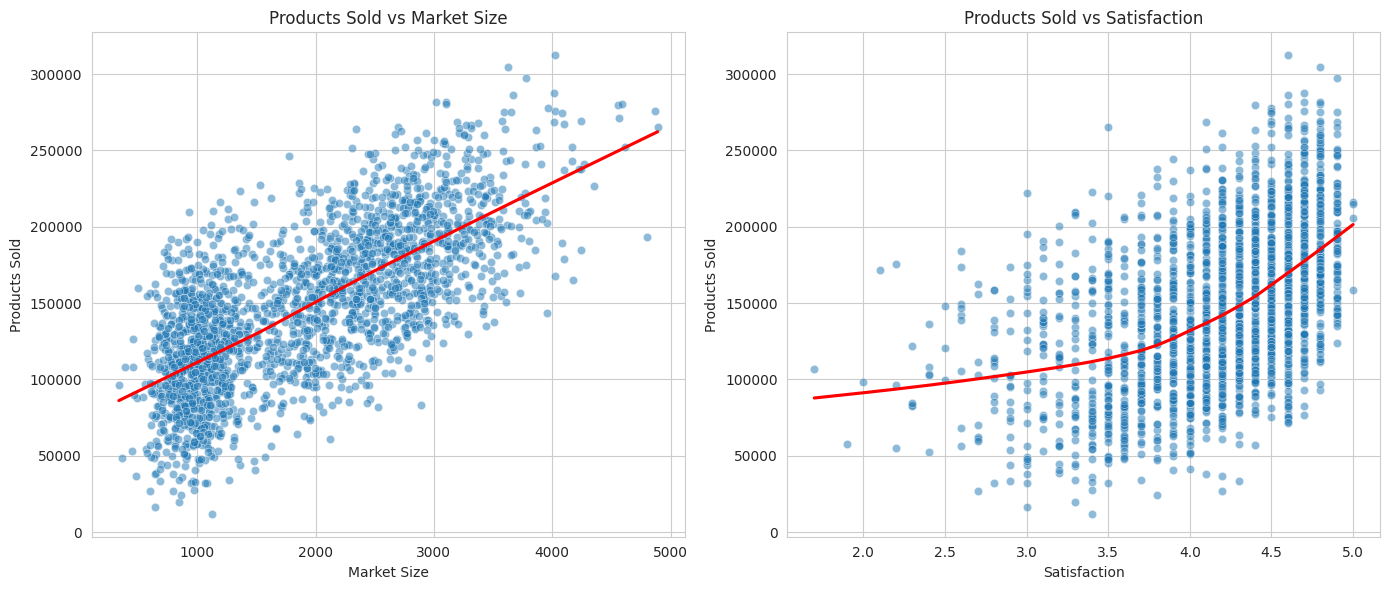

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Scatterplot for products_sold vs market_size with a lowess curve
sns.scatterplot(data=imputed_data, x='market_size', y='products_sold', ax=ax[0], alpha=0.5)
sns.regplot(data=imputed_data, x='market_size', y='products_sold', ax=ax[0], scatter=False, lowess=True, color='red')

ax[0].set_title('Products Sold vs Market Size')
ax[0].set_xlabel('Market Size')
ax[0].set_ylabel('Products Sold')

# Scatterplot for products_sold vs satisfaction with a lowess curve
sns.scatterplot(data=imputed_data, x='satisfaction', y='products_sold', ax=ax[1], alpha=0.5)
sns.regplot(data=imputed_data, x='satisfaction', y='products_sold', ax=ax[1], scatter=False, lowess=True, color='red')

ax[1].set_title('Products Sold vs Satisfaction')
ax[1].set_xlabel('Satisfaction')
ax[1].set_ylabel('Products Sold')

plt.tight_layout()
plt.show()


The following is suggested by the scatterplots with lowess curves for Products Sold vs. Market Size and Products Sold vs. Satisfaction:

Market Size: As seen by the lowess line's curvature, there seems to be a strong, positive correlation between market size and the quantity of products sold, albeit this relationship may not be strictly linear at certain locations. This implies that the quantity of products sold rises in proportion to market size, albeit the pace of increase may vary at different market sizes.
Satisfaction: There is some nonlinearity in the relationship between satisfaction and the quantity of products sold. The lowess curve suggests that there may be differences in the ways that customer satisfaction levels affect the quantity of products sold and that the relationship is not strictly linear.



# **Part 2**

**Assignment 4**

In [117]:
from statsmodels.formula.api import ols
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Convert categorical variables into dummy variables
df_dummies = pd.get_dummies(df[['product_category', 'quality']], drop_first=True)

# Concatenate the original dataframe with the new dummy variables
df_with_dummies = pd.concat([df, df_dummies], axis=1)

# Drop original categorical columns as they are now encoded
df_with_dummies.drop(['product_category', 'quality'], axis=1, inplace = True )

# Impute missing values
imputed_data = IterativeImputer().fit_transform(df_with_dummies)
imputed_data = pd.DataFrame(imputed_data, columns=df_with_dummies.columns)

# Fit the regression model
# Adjusted the formula to match the column names generated by get_dummies
model2 = ols( 'products_sold ~ product_category_health + product_category_other + product_category_toys + quality_premium + discount + retail_price + satisfaction + perc_physical + market_size', data=imputed_data).fit()
print (model2.summary())


                            OLS Regression Results                            
Dep. Variable:          products_sold   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     878.5
Date:                Fri, 05 Apr 2024   Prob (F-statistic):               0.00
Time:                        21:49:00   Log-Likelihood:                -25870.
No. Observations:                2250   AIC:                         5.176e+04
Df Residuals:                    2240   BIC:                         5.182e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -7

The results of the regression model offer a thorough summary of the relationships between various factors and the number of products sold. Below is a summary of the results for every variable in the model:
This output represents the results of an Ordinary Least Squares (OLS) regression analysis with the dependent variable "products_sold" and several independent variables. Here's what each variable means and their implications based on the regression results:

1. **Intercept**: This represents the constant term in the regression equation. It indicates the expected value of the dependent variable when all independent variables are zero. In this case, it's negative, suggesting that without any other factors, there will be a negative value of products sold, which might not make sense practically.

2. **product_category_health, product_category_other, product_category_toys**: These are categorical variables representing different product categories. Their coefficients represent the expected change in products sold when the respective category is present compared to a baseline (which is not explicitly stated here). For example, holding other variables constant, products sold are expected to decrease by $19,940 if the product belongs to the health category compared to the baseline category.

3. **quality_premium, discount, retail_price, satisfaction, perc_physical, market_size**: These are continuous variables. Their coefficients represent the expected change in products sold for a one-unit change in each respective variable, holding all other variables constant. For example, for every unit increase in quality_premium, products sold are expected to decrease by $10,930.

4. **R-squared**: This is a measure of how well the independent variables explain the variation in the dependent variable. In this case, it's 0.779, indicating that roughly 77.9% of the variability in products_sold is explained by the independent variables in the model.

5. **Adj. R-squared**: Similar to R-squared but adjusted for the number of predictors in the model. It's 0.778 in this case.

6. **F-statistic**: This tests the overall significance of the regression model. A higher F-statistic suggests that at least one independent variable is significantly related to the dependent variable. Here, it's quite high at 878.5, with a very low p-value, indicating that the overall model is significant.

7. **Prob (F-statistic)**: This is the p-value associated with the F-statistic. In this case, it's very close to zero, indicating that the overall model is statistically significant.

8. **Omnibus, Prob(Omnibus), Skew, Kurtosis**: These are tests for normality of residuals. A low p-value in the Omnibus test suggests that the residuals are not normally distributed, which might indicate an issue with the model.

9. **Durbin-Watson**: This tests for autocorrelation of residuals. The value here is around 1.94, which suggests that there might be some positive autocorrelation present.

10. **Notes**: These are additional notes regarding the assumptions of the regression model. It mentions that there might be multicollinearity or other numerical problems due to the large condition number.

In summary, this regression analysis suggests that the variables included in the model collectively have a significant relationship with the number of products sold. However, further analysis might be needed to address potential issues such as multicollinearity and non-normality of residuals.

**Assignment 5**

In [119]:
# Define the characteristics of the new product
new_product = {
    'product_category_health': 0,  # Assuming not a health product
    'product_category_other': 0,   # Assuming not in 'other' category
    'product_category_toys': 1,    # Toy category
    'quality_premium': 1,          # Premium quality
    'discount': 20,                # 20 weeks discount
    'retail_price': 10,            # Retail price 10 euros
    'satisfaction': 4.6,           # 4.6 stars satisfaction
    'perc_physical': 55,          # 55% physical
    'market_size': 1000            # Market size 1000
}

# Predict the number of items sold
predicted_items_sold = model2.predict(new_product)
print("Predicted items sold:", predicted_items_sold)


Predicted items sold: 0    123959.116351
dtype: float64
